In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, datasets

from tensorflow.keras import layers, Sequential

# Housing Price

In [ ]:
df = datasets.load_boston()

In [ ]:
print(df.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(df['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(df['data'], columns=df['feature_names'])
y = df['target']

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.1)

In [ ]:
from tensorflow.keras import layers, Sequential

In [ ]:
model = Sequential([
                    layers.BatchNormalization(input_shape=(13,)),
                    layers.Dense(13, input_shape=(13,)),
                    layers.Dense(128, activation='relu'),
                    layers.BatchNormalization(),
                    layers.Dense(128, activation='relu'),
                    layers.BatchNormalization(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_tr, y_tr, validation_data=(X_te,y_te), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 44ms/step - loss: 540.1371 - val_loss: 412.3410
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 320.6508 - val_loss: 326.6709
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 152.8001 - val_loss: 276.2101
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 74.9353 - val_loss: 259.1942
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 32.6948 - val_loss: 227.8136
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 26.4102 - val_loss: 185.6506
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 25.8202 - val_loss: 171.6028
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 25.4665 - val_loss: 142.0310
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 24.7103 - val_loss: 122.3148
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 17.9

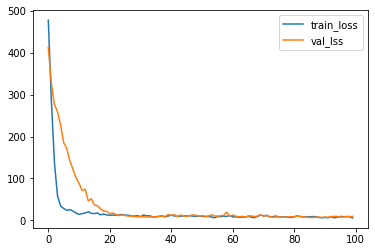

In [ ]:
plt.plot(range(100), history.history['loss'])
plt.plot(range(100), history.history['val_loss'])
plt.legend(['train_loss','val_lss'])
plt.show()

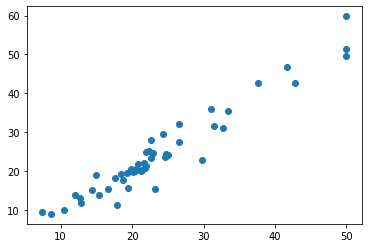

In [ ]:
y_pred = model.predict(X_te)
plt.scatter(y_te, y_pred)

In [ ]:
y_pred = y_pred.flatten()
err = np.round(y_te - y_pred, 2)
err

array([ 1.44,  0.34, -5.39,  0.81,  0.9 , -3.89,  0.98,  0.77, -0.08,
        1.28,  0.45,  0.49,  1.16, -1.68, -5.03, -0.85, -1.71, -0.84,
       -1.3 , -5.3 , -9.81, -0.2 , -0.7 , -0.51,  0.21, -2.83, -0.56,
        1.01, -4.91,  7.82, -2.12, -5.29, -2.72, -0.42,  0.33,  0.1 ,
        6.73,  1.66,  0.62, -2.09,  1.  ,  0.9 , -0.69,  6.98,  0.9 ,
        0.02,  3.66, -0.27, -4.94, -1.1 , -0.36])

# Iris dataset


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [ ]:
data = datasets.load_iris()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
 X = pd.DataFrame(data['data'], columns=data['feature_names'])
 y = pd.Series(data['target'])
 y.name = data['target_names'][0]
 y.value_counts()

2    50
1    50
0    50
Name: setosa, dtype: int64

In [ ]:
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y = to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.1)

In [ ]:
model = Sequential([
                    layers.Dense(10, input_shape=(4,)),
                    layers.Dense(128, activation='relu'),
                    layers.BatchNormalization(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(128, activation='softmax'),
                    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',  loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_tr, y_tr, validation_data=(X_te,y_te), epochs=35)

Epoch 1/35
5/5 [==============================] - 1s 55ms/step - loss: 1.0943 - accuracy: 0.3920 - val_loss: 1.0962 - val_accuracy: 0.2667
Epoch 2/35
5/5 [==============================] - 0s 11ms/step - loss: 1.0733 - accuracy: 0.7175 - val_loss: 1.0928 - val_accuracy: 0.2667
Epoch 3/35
5/5 [==============================] - 0s 12ms/step - loss: 1.0475 - accuracy: 0.7176 - val_loss: 1.0871 - val_accuracy: 0.2667
Epoch 4/35
5/5 [==============================] - 0s 14ms/step - loss: 1.0195 - accuracy: 0.7027 - val_loss: 1.0802 - val_accuracy: 0.2667
Epoch 5/35
5/5 [==============================] - 0s 11ms/step - loss: 0.9867 - accuracy: 0.7411 - val_loss: 1.0766 - val_accuracy: 0.2667
Epoch 6/35
5/5 [==============================] - 0s 11ms/step - loss: 0.9579 - accuracy: 0.7507 - val_loss: 1.0760 - val_accuracy: 0.3333
Epoch 7/35
5/5 [==============================] - 0s 12ms/step - loss: 0.9453 - accuracy: 0.7731 - val_loss: 1.0707 - val_accuracy: 0.5333
Epoch 8/35
5/5 [===========

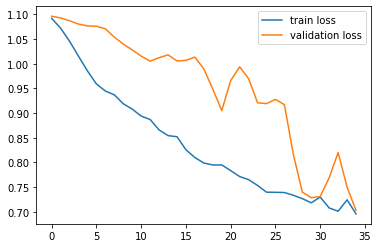

In [ ]:
plt.plot(range(35), hist.history['loss'])
plt.plot(range(35), hist.history['val_loss'])
plt.legend(['train loss','validation loss'])
plt.show()

In [ ]:
model.predict(X)

array([[0.48093954, 0.25685447, 0.262206  ],
       [0.46676958, 0.26783878, 0.2653917 ],
       [0.47760916, 0.25959024, 0.26280057],
       [0.46272507, 0.2712035 , 0.2660714 ],
       [0.4828142 , 0.25547448, 0.2617113 ],
       [0.47180176, 0.26337674, 0.26482147],
       [0.4747214 , 0.261734  , 0.26354465],
       [0.4740009 , 0.26210505, 0.26389405],
       [0.4595998 , 0.27414605, 0.26625416],
       [0.46820465, 0.2667419 , 0.2650535 ],
       [0.4816641 , 0.25620532, 0.26213053],
       [0.4681203 , 0.26667702, 0.2652027 ],
       [0.4703671 , 0.2652058 , 0.26442704],
       [0.4827608 , 0.25592232, 0.26131684],
       [0.492989  , 0.24787325, 0.25913784],
       [0.4889316 , 0.25075305, 0.26031545],
       [0.48707974, 0.25218588, 0.26073438],
       [0.4781791 , 0.25888354, 0.26293734],
       [0.47286937, 0.2625204 , 0.26461026],
       [0.4808527 , 0.25684875, 0.26229855],
       [0.4633627 , 0.26984754, 0.26678976],
       [0.47562578, 0.26071596, 0.26365823],
       [0.

# Diabetes

In [ ]:
data = datasets.load_diabetes()
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
X,y = pd.DataFrame(data['data'], columns=data['feature_names']), pd.Series(data['target'])

In [ ]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
y.value_counts()

200.0    6
72.0     6
178.0    5
90.0     5
71.0     5
        ..
162.0    1
302.0    1
346.0    1
153.0    1
261.0    1
Length: 214, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y, test_size=0.2)

In [ ]:
model = Sequential([
                          layers.BatchNormalization(),
                          layers.Dense(40, input_shape=(10,)),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(1, activation='linear')
])

model.compile(optimizer='rmsprop', loss='mean_squared_error')
hist = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=200, batch_size=100)

Epoch 1/200
4/4 [==============================] - 1s 63ms/step - loss: 28734.7156 - val_loss: 31190.7383
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 28217.6793 - val_loss: 31152.5977
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 28677.8695 - val_loss: 31109.3770
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 28149.8094 - val_loss: 31056.9668
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 28722.3344 - val_loss: 30995.0254
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 27212.9883 - val_loss: 30916.7949
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 27642.5648 - val_loss: 30826.6406
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 26799.9582 - val_loss: 30718.5059
Epoch 9/200
4/4 [==============================] - 0s 14ms/step - loss: 26373.6449 - val_loss: 30591.7871
Epoch 10/200
4/4 [============================

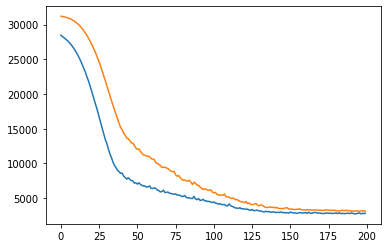

In [ ]:
plt.plot(range(200), hist.history['loss'])
plt.plot(range(200), hist.history['val_loss'])
plt.show()

In [ ]:
y_pred = model.predict(X_te).flatten()
err = y_te - y_pred
err

51      59.645523
58      95.827660
327      3.646896
3       63.251343
393    -49.351166
          ...    
277    -49.889069
283     79.757683
405      8.181824
395    112.403595
141    110.938370
Length: 89, dtype: float64

# Digits Clssifiction

In [30]:
digits = datasets.load_digits()

In [31]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [57]:
X = digits['data']
y = digits['target']

In [58]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [59]:
print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [60]:
X.dtype

dtype('float64')

In [61]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [62]:
X_tr,X_te, y_tr, y_te = model_selection.train_test_split(X,y, test_size=0.2)

In [63]:
enc = preprocessing.OneHotEncoder()
y_tr = enc.fit_transform(y_tr.reshape(-1,1)).toarray()
y_te = enc.fit_transform(y_te.reshape(-1,1)).toarray()

In [69]:
model = Sequential([
                    layers.Dense(128, input_shape=(64,)),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=20)

Epoch 1/20
45/45 [==============================] - 1s 6ms/step - loss: 2.0270 - accuracy: 0.5757 - val_loss: 0.3668 - val_accuracy: 0.8889
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9338 - val_loss: 0.2566 - val_accuracy: 0.9222
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9643 - val_loss: 0.2084 - val_accuracy: 0.9389
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9817 - val_loss: 0.3343 - val_accuracy: 0.9361
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9749 - val_loss: 0.1162 - val_accuracy: 0.9583
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.1310 - val_accuracy: 0.9611
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9992 - val_loss: 0.1398 - val_accuracy: 0.9611
Epoch 8/20
45/45 [==

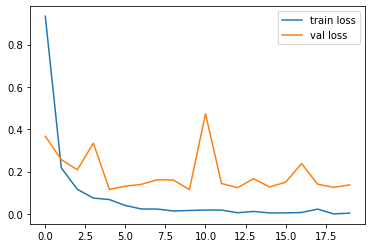

In [70]:
plt.plot(range(20), hist.history['loss'])
plt.plot(range(20), hist.history['val_loss'])
plt.legend(['train loss','val loss'])
plt.show()

In [76]:
pred = np.round(model.predict(X_te), 2)
pred = [i.argmax() for i in pred]
pred_df = pd.DataFrame()
pred_df['y_te'] = enc.inverse_transform(y_te).flatten()
pred_df['pred'] = pred


[4,
 0,
 0,
 3,
 2,
 5,
 9,
 9,
 1,
 4,
 9,
 1,
 5,
 4,
 3,
 3,
 8,
 7,
 0,
 4,
 1,
 0,
 9,
 6,
 8,
 5,
 0,
 7,
 6,
 5,
 7,
 9,
 5,
 8,
 7,
 1,
 4,
 9,
 3,
 1,
 8,
 4,
 7,
 5,
 5,
 9,
 9,
 7,
 7,
 6,
 3,
 3,
 8,
 4,
 8,
 6,
 4,
 5,
 9,
 1,
 7,
 5,
 6,
 4,
 5,
 2,
 9,
 1,
 7,
 7,
 1,
 9,
 9,
 9,
 8,
 3,
 0,
 7,
 0,
 2,
 0,
 4,
 3,
 8,
 3,
 2,
 5,
 0,
 2,
 4,
 2,
 9,
 4,
 1,
 9,
 3,
 5,
 4,
 6,
 6,
 5,
 0,
 7,
 0,
 1,
 9,
 4,
 6,
 1,
 6,
 9,
 3,
 6,
 4,
 6,
 4,
 4,
 5,
 5,
 7,
 1,
 0,
 4,
 1,
 8,
 8,
 6,
 2,
 1,
 1,
 7,
 9,
 4,
 6,
 7,
 8,
 4,
 2,
 1,
 4,
 9,
 0,
 0,
 0,
 5,
 0,
 2,
 0,
 6,
 2,
 7,
 2,
 2,
 9,
 5,
 5,
 9,
 0,
 8,
 2,
 0,
 9,
 4,
 9,
 2,
 2,
 3,
 6,
 5,
 9,
 9,
 4,
 7,
 6,
 5,
 7,
 7,
 0,
 4,
 1,
 0,
 4,
 4,
 1,
 4,
 1,
 6,
 6,
 5,
 4,
 0,
 1,
 8,
 4,
 6,
 8,
 8,
 7,
 1,
 6,
 5,
 4,
 0,
 6,
 8,
 2,
 6,
 4,
 1,
 6,
 8,
 3,
 8,
 4,
 5,
 9,
 3,
 6,
 9,
 0,
 9,
 3,
 7,
 0,
 7,
 9,
 2,
 7,
 2,
 1,
 3,
 5,
 3,
 5,
 5,
 2,
 8,
 2,
 5,
 8,
 1,
 3,
 9,
 6,
 3,
 2,
 5,
 3,
 3,
 1,


In [78]:
pred_df['pred_diff'] = 0
pred_df.loc[pred_df['y_te']!=pred_df['pred'],'pred_diff'] = 1
pred_df['pred_diff'].value_counts()

0    351
1      9
Name: pred_diff, dtype: int64

# Linnerud

In [79]:
linnerud = datasets.load_linnerud()
linnerud.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'DESCR', 'data_filename', 'target_filename'])

In [81]:
X = pd.DataFrame(linnerud['data'], columns=linnerud['feature_names'])
y = linnerud['target']

In [82]:
X

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [83]:
y

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [84]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.2, random_state=0)

In [89]:
model = Sequential([
                    layers.Dense(10, input_shape=(3,)),
                    layers.BatchNormalization(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(3, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 668ms/step - loss: 12682.4141 - val_loss: 11335.8496
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 12672.0977 - val_loss: 11064.2871
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 12661.8115 - val_loss: 10915.2168
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 12651.5391 - val_loss: 10811.5684
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 12641.2666 - val_loss: 10730.4766
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 12631.0117 - val_loss: 10664.1299
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 12620.7500 - val_loss: 10608.5508
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 12610.5117 - val_loss: 10560.4072
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 12600.2979 - val_loss: 10517.4541
Epoch 10/100
1/1 [===========================

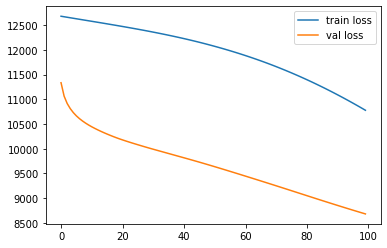

In [91]:
plt.plot(range(100), hist.history['loss'])
plt.plot(range(100), hist.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.show()

# Wine quality

In [92]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [93]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [94]:
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [101]:
X.shape, y.shape

((178, 13), (178,))

In [97]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.2)

In [100]:
enc = preprocessing.OneHotEncoder()
y_tr = enc.fit_transform(y_tr.reshape(-1,1)).toarray()
y_te = enc.transform(y_te.reshape(-1,1)).toarray()

In [104]:
print(y_tr.shape)
y

(142, 3)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [105]:
model = Sequential([
                    layers.Dense(10, input_shape=(13,)),
                    layers.BatchNormalization(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 62ms/step - loss: 0.9905 - accuracy: 0.4080 - val_loss: 7.0486 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7530 - accuracy: 0.7164 - val_loss: 7.5385 - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6739 - accuracy: 0.6919 - val_loss: 7.5956 - val_accuracy: 0.2500
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6501 - accuracy: 0.6862 - val_loss: 6.4771 - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5952 - accuracy: 0.7053 - val_loss: 4.8769 - val_accuracy: 0.2500
Epoch 6/100
5/5 [==============================] - 0s 55ms/step - loss: 0.5461 - accuracy: 0.7423 - val_loss: 3.6395 - val_accuracy: 0.2500
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4982 - accuracy: 0.8340 - val_loss: 2.8611 - val_accuracy: 0.3056
Epoch 8/100
5/5 [===

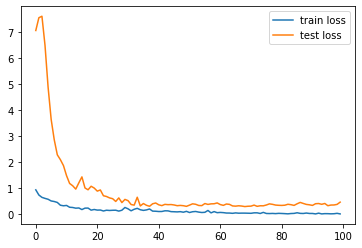

In [106]:
plt.plot(range(100), hist.history['loss'])
plt.plot(range(100), hist.history['val_loss'])
plt.legend(['train loss', 'test loss'])
plt.show()

# Breast Cancer

In [107]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [108]:
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

In [109]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [110]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [112]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.2, random_state=0)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((455, 30), (114, 30), (455,), (114,))

In [115]:
model = Sequential([
                    layers.Dense(32, input_shape=(30,)),
                    layers.Dense(128, activation='relu'),
                    layers.BatchNormalization(),
                    layers.Dense(64, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.5770 - accuracy: 0.6637 - val_loss: 5.0328 - val_accuracy: 0.4123
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2802 - accuracy: 0.9018 - val_loss: 2.1558 - val_accuracy: 0.4123
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.9058 - val_loss: 1.3326 - val_accuracy: 0.5526
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9174 - val_loss: 1.0880 - val_accuracy: 0.5526
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1738 - accuracy: 0.9445 - val_loss: 0.6158 - val_accuracy: 0.6930
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1887 - accuracy: 0.9266 - val_loss: 0.7820 - val_accuracy: 0.6667
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1604 - accuracy: 0.9369 - val_loss: 0.2652 - val_accuracy: 0.8772
Epoch 8/100


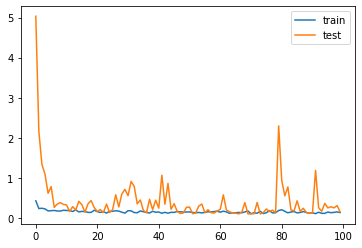

In [116]:
plt.plot(range(100), hist.history['loss'])
plt.plot(range(100), hist.history['val_loss'])
plt.legend(['train','test'])
plt.show()

In [117]:
len(hist.history['loss']), len(hist.history['val_loss'])

(100, 100)